In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


Both Neuro and Mus: 1562
Only Neuro: 632
Only Mus: 963
Neither Neuro nor Mus: 806
Dropping 99
(3598, 14)
Index(['Fatigue', 'Headache', 'Joint Pain', 'Muscle aches', 'Neuropathy',
       'Twitching', 'Memory Loss', 'Cognitive Impairment', 'Sleep Impairment',
       'Psychiatric', 'Heart related', 'Gastrointestinal', 'musculo', 'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


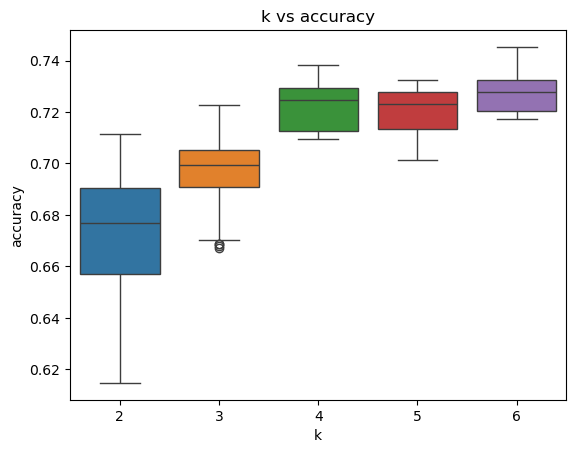

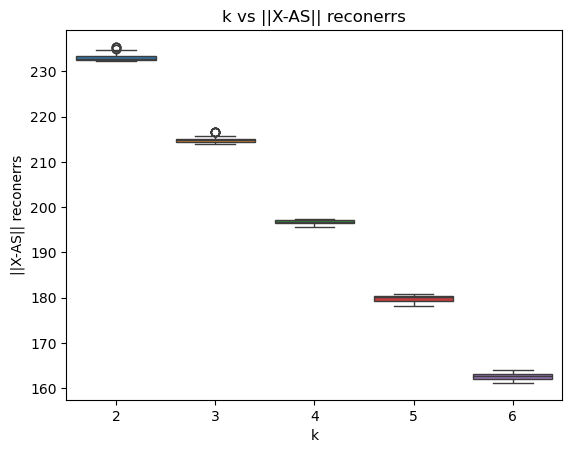

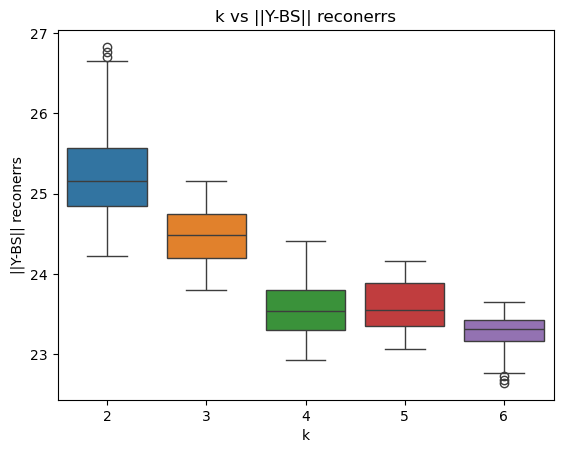

NameError: name 'Xtest_distr' is not defined

In [3]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO, MUSCULO},{SYMPTOMS},{NEURO, MUSCULO}, defn=DEF_OWD, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)


# REDUCED OF LAMBDA,   RANDDOM STATES
# best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
#                                                           get_topic_accu_distr=True, get_reconerr_distr=True)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtest_reconerr_distr = ssnmf.gridsearch(param_range={'k': range(2,7),'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


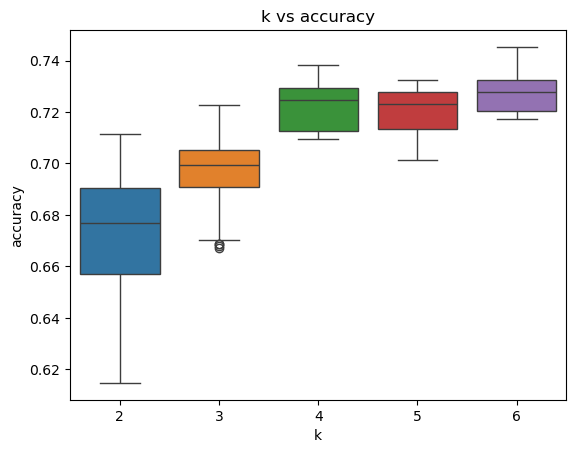

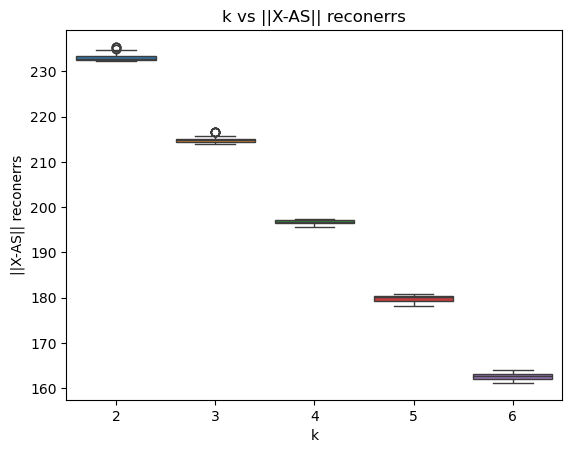

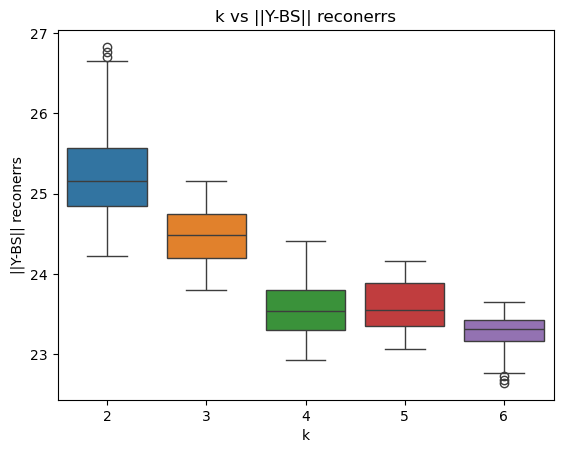

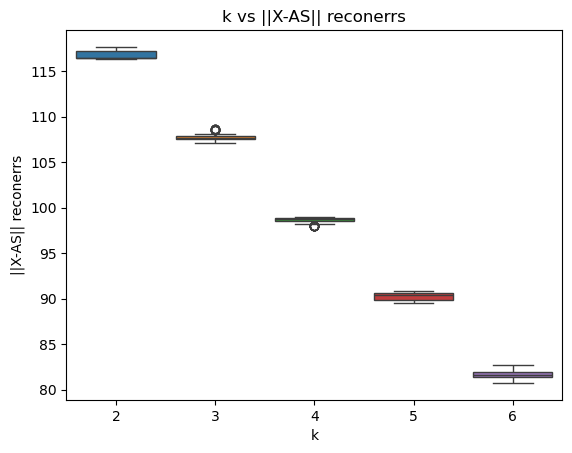

OWD Working Definition: Neuro vs Musculo
best accuracy:  0.7453097826086956  best params:  {'k': 6, 'lambda': 0.8888888888888888, 'random_state': 6}
test_accuracy:  (0.7013888888888888, 93.52358078639101)


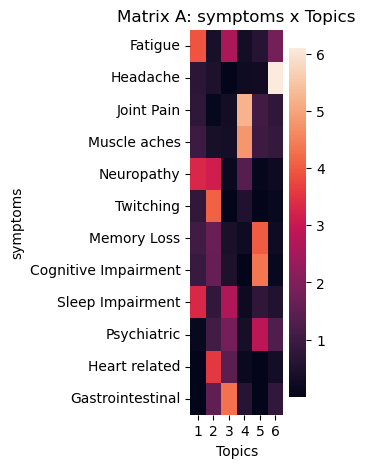

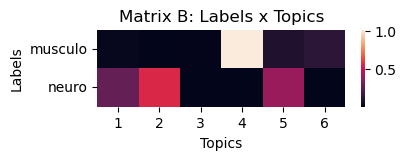

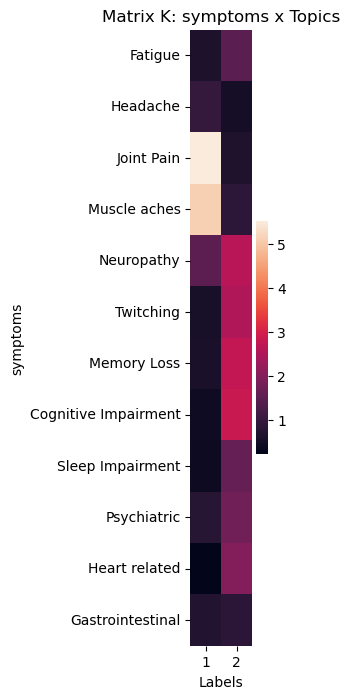

In [4]:
display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(Xtest_reconerr_distr, ylabel='||X-AS|| reconerrs')

print('OWD Working Definition: Neuro vs Musculo')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)
